# Machine Learning Final Project

## Step 0: Project Ideation & Dataset Inspection

### Instructions
1. **Dataset Loading**:

    - For each plan (e.g., Plan A, Plan B, etc.), read in the corresponding dataset.

2. **Inspect the Dataset**:

    - After loading the dataset, display the first few rows to understand its structure.

    - Identify and list the types of fields (e.g., numerical, categorical, text).

    - Attempt to identify the target variable if your project involves supervised learning.

### Plan A: Animal drug use adverse event

In [1]:
# Your code here

import pandas as pd
import re
import requests

# Define the base URL and initial query parameters
url = 'https://api.fda.gov/animalandveterinary/event.json?'
search = 'search=drug.active_ingredients.name:"Moxidectin"&limit=1000'
url = url + search

results = []

while True:
    # Make the request to the API
    a = requests.get(url)
    data = a.json()
    
    # Convert the JSON response to a DataFrame and select specific columns
    df = pd.DataFrame(data['results'])
    df = df[['treated_for_ae', 'reaction', 'time_between_exposure_and_onset', 'drug', 'health_assessment_prior_to_exposure', 'onset_date', 'animal', 'type_of_information', 'serious_ae', 'outcome']]
    results.append(df)
    
    # Try to get the next page URL from the 'Link' header
    try:
        link_header = a.headers.get('Link', '')
        b = re.search(r'<(https[^>]+)>', link_header)
        if b:
            next_url = b.group(1)
            url = next_url
        else:
            break
    except Exception as e:
        print(f"An error occurred: {e}")
        break

# Concatenate all DataFrames into one
df_combined = pd.concat(results, axis=0)

# Print information about the final DataFrame
print(df_combined.info())


<class 'pandas.core.frame.DataFrame'>
Index: 74845 entries, 0 to 844
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   treated_for_ae                       51922 non-null  object
 1   reaction                             74843 non-null  object
 2   time_between_exposure_and_onset      7237 non-null   object
 3   drug                                 74845 non-null  object
 4   health_assessment_prior_to_exposure  74845 non-null  object
 5   onset_date                           68531 non-null  object
 6   animal                               68776 non-null  object
 7   type_of_information                  74845 non-null  object
 8   serious_ae                           54204 non-null  object
 9   outcome                              56284 non-null  object
dtypes: object(10)
memory usage: 6.3+ MB
None


### Plan B: Biomedical Image Analysis

In [22]:
# Your code here
from medmnist import PathMNIST
from medmnist import INFO
import numpy as np
from tqdm import tqdm
import pandas as pd

# Download the dataset
data_flag = 'pathmnist'
download = True
info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# Load training and testing datasets
train_dataset = DataClass(split='train', download=download)
test_dataset = DataClass(split='test', download=download)

# Inspect the dataset
print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

# Example of loading the dataset into a DataLoader
train_loader = [(np.array(img), label) for img, label in tqdm(train_dataset)]
test_loader = [(np.array(img), label) for img, label in tqdm(test_dataset)]

# Now train_loader and test_loader contain the data





Using downloaded and verified file: /home/vscode/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/vscode/.medmnist/pathmnist.npz
Train dataset size: 89996
Test dataset size: 7180


100%|██████████| 7180/7180 [00:00<00:00, 36225.82it/s]


In [23]:
# load the data
train_dataset = DataClass(split='train', download=download)
print(train_dataset)

Using downloaded and verified file: /home/vscode/.medmnist/pathmnist.npz
Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /home/vscode/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. 

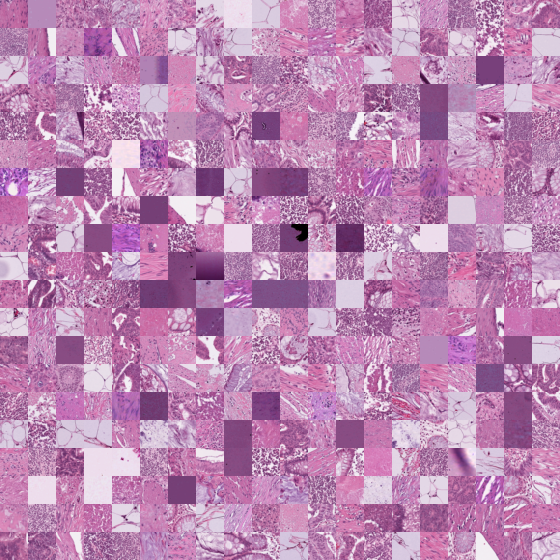

In [24]:
# visualization

train_dataset.montage(length=20)

In [27]:
x, y = train_dataset[0]

print(np.array(x).shape, y.shape)

(28, 28, 3) (1,)


### Plan C: Website Fact Checker

In [ ]:
# Your code here